(app:turning-points)=
# Classical Turning Points

When a classical particle with energy $E$ is confined in a potential $U(x)$. (See {numref}`fig:turning-points`.)  The particle oscillates between turning points $x_1$ and $x_2$.  The period of oscillation{cite}`Taylor2004` is given by

$$
T=2 \int_{x_1}^{x_2} \frac{1}{v(x)}\, dx
$$(eq:oscillation-period1)

where the speed of the particle at $x$ is given by

$$
v(x) = \sqrt{\frac{2(E-U(x))}{m}}
$$(eq:bound-state-speed1}

The integral bounds are determined by solving $v(x)=0$, which leads to $E-U(x)=0$.  Unless the potential takes a simple mathematical form, we need to find the turning point numerically.

```{figure} turning_points.png
---
height: 300px
name: fig:turning-points
---
Energy diagram of a claasical particle confined in a potential $U(x)$.
```

Let us investigate the vibration of a diatomic molecule. The inter-atomic interaction is often modeled either by the Morse potential or by the Lenard-Jones potential.
The Morse potential defined by
$$
U_M(r) = D_e\left[e^{- 2 a r} - 2 e^{-a r}\right]
$$

where $r$ is the inter-atomic distance and $r_c$ is the equilibrium distance.  $D_e>0$ is the dissociation energy.  When the kinetic energy $E$ exceeds it, the molecule breaks up.  When $E<D_e$, the molecule vibrates.  The positive constant $a$ along with $D_e$ controls the strength of the force between the atoms.  The first term represents repulsion between the atoms and the second term attraction. This potential is often used to describe the vibration of covalently bounded molecules. For numerical purpose,  energy and potential are normalized as $k = E/D_e$ and $u = U/D_e$.  The distance is normalized as $x=a r$.  Then, the potential energy becomes

$$
u_M(x) =e^{- 2 x} - 2 e^{-x}
$$

The Lenard-Jones potential is given by

$$
U_{LJ} = 4 D_e \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right]
$$

where $\sigma$ is a positive constant. Similarly to the Morse potential, the first term comes from the repulsive force and the second term from the attractive force. The latter represents the van der Waals attraction thus this potential works for weakly bounded diatomic molecules.

Normalizing the distance as $x=\displaystyle\frac{\sigma}{r}$, we have a simple expression

$$
u_{LJ} = 4 \left(\frac{1}{x^{12}} - \frac{1}{x^6}\right)
$$

These potentials are mathematically simple enough that the location of the potential minimum $x_\text{min}$,  and also the turning points $x_1$ and $x_2$ can be obtained by hand calculation.  

$$
\begin{align}
x_\text{min} &= 0, \quad &x_1 &= - \ln (1+\sqrt{k}), \quad & x_2 &= -\ln (1-\sqrt{k})\qquad &\text{Morse potential}& \\
x_\text{min} &= 2^{1/6}, \quad &x_1 & = x_\text{min} (1-\sqrt{k}), \quad &x_2 &=  x_\text{min} (1+\sqrt{k})\qquad &\text{Lennard-Jones potential}&
\end{align}
$$

where the turning points are the roots of $u(x) = k-1$ where $0<k<1$ is the (normalized) kinetic energy.  

While these potentials are mathematically convenient, they do not accurately represent the real molecular interaction. An old idea to improve the accuracy for a certain molecules, a hybrid mode, which takes the repulsive part from the Morse potential and the attractive part from the Lenard-Jones potential, was proposed.  The resulting expression becomes a bit complicated as follows {cite}`Konowalow1969`:

$$
U_\text{hybrid} (r) = D_e \frac{a}{a-6} \left[\frac{6}{a} e^{a(1-r/\sigma)} - \left(\frac{\sigma}{r}\right)^6\right]
$$

which is sometimes called the (exp-6) potential.
It has two parameters $a$ and $\sigma$ inherited from the two original potentials.  However, $a$ is dimensionless now and thus we cannot get rid of it by normalization.  Introducing the normalized distance $x=r/\sigma$ and normalized energy $u = U/D_e$, the potential is simplified as

$$
u_\text{hybrid}(x) = \frac{a}{a-6} \left(\frac{6}{a} e^{a(1-x)} - 1/x^6\right)
$$

which has the potential minimum at $x=1$ and the depth of the potential $u(1)=-1$. As $x \rightarrow \infty$, the potential vanishes and thus the dissociation energy is 1.  Hence, it has all desired properties.  An drawback is that while we can find the location of the potential minimum without a computer, we are no longer able to calculate the turning points by hand. We need to get them numerically.

## Turning points of the Morse Potential

In order to boost our confidence on the canned routine, we compute the turning points for the Morse potential using `scipy.optimize.bisect` and `scipy.optimize.newton`.  Then, we compare the results with the exact answer.  First we plot the potential and find the brackets by visual inspection.

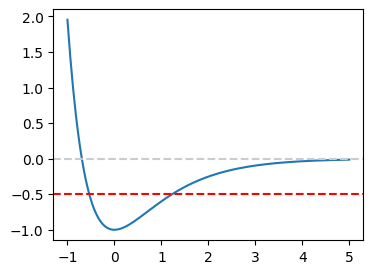

In [1]:
import numpy as np

def v(x):
    return np.exp(-2.*x) - 2.*np.exp(-x)

import matplotlib.pyplot as plt

x = np.linspace(-1,5,201)
y = v(x)

plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.axhline(y = 0, color = '0.8', linestyle = '--')
plt.axhline(y = -0.5, color = 'r', linestyle = '--')
plt.show()

From the plot, it is clear that one turning point must be between $-1$ and $0$.  The other turning point can be anywhere between $0$ and $2$.  Let us find the turning points for the kinetic energy $k=1/2$ (the red line in the above plot). we can safely say that the upper turning point is between 1 and 3.  So, we don't have to use a bracketing program.  We use the bisection and secant methods and compare the results.

In [2]:
# continued from the previous code cell

from scipy.optimize import bisect, newton

def f(x):
    return v(x)-k+1

# set the kinetic energy
k=0.5

# inner turning point
x1_bisect = bisect(f,-1,0)
x1_secant = newton(f,-1)
x1_exact = -np.log(1+np.sqrt(k))

# outer turning point
x2_bisect = bisect(f,0,4.0)
x2_secant = newton(f,2)
x2_exact = -np.log(1-np.sqrt(k))

print("bisection: x1={0:15.10f},  x2={1:15.10f}".format(x1_bisect,x2_bisect))
print("   secant: x1={0:15.10f},  x2={1:15.10f}".format(x1_secant,x2_secant))
print("    exact: x1={0:15.10f},  x2={1:15.10f}".format(x1_exact,x2_exact))

bisection: x1=  -0.5347999967,  x2=   1.2279471773
   secant: x1=  -0.5347999967,  x2=   1.2279471773
    exact: x1=  -0.5347999967,  x2=   1.2279471773


All three agree perfectly.  Now, we are confertable to use `bisect` and `newton` in `scipy`.

> **Exercise:**  Find the turning points of the Lenard-Jones potential for $k=0.5$ and compare the results with the exact values.

## Turning points of the (exp-6) hybrid potential

The hybrid potential has one parameter to be specified.  We try $a=2$.  Let plot the potential first.

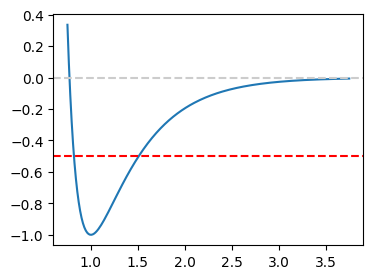

In [3]:
import numpy as np

def v(x):
    return a/(a-6)*( (6/a) *np.exp(a*(1-x))-1/x**6)

import matplotlib.pyplot as plt

a=2.0
x = np.linspace(0,3,201)+0.75
y = v(x)

plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.axhline(y = 0, color = '0.8', linestyle = '--')
plt.axhline(y = -0.5, color = 'r', linestyle = '--')
plt.show()

Clearly $x_1$ is above 0.5 and below 1, and $x_2$ between 1.0 and 2.0.

In [4]:
# continued from the previous code cell

from scipy.optimize import bisect, newton

def f(x):
    return v(x)-k+1

# set the kinetic energy
k=0.5

# inner turning point
x1_bisect = bisect(f,0.5,1)
x1_secant = newton(f,0.5)

# outer turning point
x2_bisect = bisect(f,1,2)
x2_secant = newton(f,2)

print("bisection: x1={0:15.10f},  x2={1:15.10f}".format(x1_bisect,x2_bisect))
print("   secant: x1={0:15.10f},  x2={1:15.10f}".format(x1_secant,x2_secant))


bisection: x1=   0.8193184406,  x2=   1.5085928545
   secant: x1=   0.8193184406,  x2=   1.5085928545


Visually, these answers are consistent with the crossing points of the red dashed line and the blue curve in the plot.

In Chapter {numref}`app:oscillation-period`, we evaluate the period of the oscillation by integrating Eq. {eq}`eq:oscillation-period1` where we use the above results.


___

Last modified on 3/14/2024 by R. Kawai